In [7]:
#import all dependencies

import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
#Reading data
rnaseq = pd.read_csv("G9_liver_gene-expr.csv")
mystery = pd.read_csv("mystery_gene-expr.csv")

#Pre-processing data
rnaseq.dropna()
rnaseq.iloc[:, 1].unique()
rnaseq.rename(columns = {'Primary Tumor':'0'})

mystery.dropna()
mystery.iloc[:, 1].unique()
mystery.rename(columns = {'Primary Tumor':'0'})

#Defining dependant variable
y = mystery['Label'].values
y_myst = mystery['Label'].values

#Encoding categorical data
Labelencoder = LabelEncoder()
Y_encoding = Labelencoder.fit_transform(y) # Primary Tumor = 0, Solid Tissue Normal = 1
y_mystencoding = Labelencoder.fit_transform(y_myst)

# Define the independent variables to drop the Label and Unnamed: 0
X = mystery.drop(labels = ['Label','Unnamed: 0'], axis = 1)
X_myst = mystery.drop(labels = ['Label','Unnamed: 0'], axis = 1)

feature_names = np.array(X.columns)

In [9]:
#Normalisation
scaler = StandardScaler()
scaler.fit(X)
X_scale = scaler.transform(X)
X_log2 = np.log2(X)

scaler.fit(X_myst)
X_mystscale = scaler.transform(X_myst)
X_mystlog2 = np.log2(X_myst)

#X_log2 = scaler.fit_transform(X_log2)
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y_encoding, test_size = 0.3, random_state = 42)

new_X=[]
new_Y=[]
for subarr in X_train:
    new_X.append(subarr[np.isfinite(subarr)])

for subarr in Y_train:
    new_Y.append(subarr[np.isfinite(subarr)])

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

c:\Users\oolba\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)
c:\Users\oolba\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


In [10]:
# Hyperparameters
learning_rate = 0.00013
epochs = 1000

# Variables for controlling the test example
test_example = torch.tensor(X_test, dtype=torch.float32)


# Variables
X = torch.tensor(new_X, dtype=torch.float32)
Y = torch.tensor(new_Y, dtype=torch.float32)
w = torch.tensor(0.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)


num_samples, num_features = X.shape


input_size = num_features
output_size = num_samples

class Detector(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(Detector, self).__init__()    
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.lin(x)

model = Detector(input_size, output_size)    


loss = nn.MSELoss()
loss_over_time = []
optimiser = torch.optim.SGD(model.parameters(), lr=learning_rate)

C:\Users\oolba\AppData\Local\Temp\ipykernel_23340\1759243583.py:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:248.)
  X = torch.tensor(new_X, dtype=torch.float32)


In [11]:
# Training loop
for epoch in range(epochs):

    total_loss = 0
    
    for i in range(num_samples):

        # Forward pass
        y_pred = model(X[i])
    
        # Calculate Loss
        l = loss(y_pred, Y[i])
        
        # Calculate gradients
        l.backward()

        total_loss += float(l)
    
    print(total_loss)
    loss_over_time.append(total_loss)
    # Update weights
    optimiser.step()
    optimiser.zero_grad()

c:\Users\oolba\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([266])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


225.03807730972767
156.84970612078905
123.19457937777042
103.39106891304255
89.97709233313799
80.00631638616323
72.16404791548848
65.77645311504602
60.45095968991518
55.934958171099424
52.05422721803188
48.68282479047775
45.72663603723049
43.11358031630516
40.787360325455666
38.703294198960066
36.825427984818816
35.124496743083
33.57643076404929
32.161257868632674
30.86227303557098
29.665411116555333
28.5587510317564
27.53213158249855
26.5768457762897
25.685399297624826
24.851306218653917
24.0689365696162
23.3333778437227
22.64032799936831
21.9860067833215
21.367077937349677
20.780589323490858
20.223916795104742
19.69472304917872
19.190916432067752
18.71062139235437
18.25215058028698
17.813981350511312
17.394735880196095
16.99316287972033
16.608125234022737
16.238585874438286
15.88359591551125
15.542284592986107
15.213855254463851
14.897571680136025
14.592757627367973
14.29878509696573
14.015075132250786
13.74108942039311
13.476328614167869
13.220327200368047
12.97265341039747
12.73290

20531
True positives:  50
True negatives:  62
False positives:  1
False negatives:  1
Accuracy:  0.9824561403508771


Text(0, 0.5, 'Total Mean Squared Error')

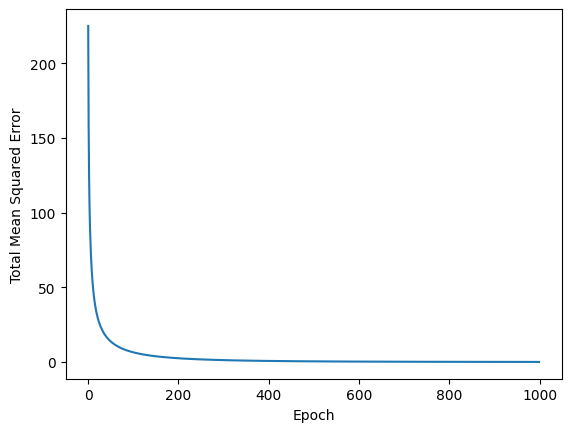

In [13]:
new_Xtest = []
new_Ytest = []

for subarr in X_test:
    new_Xtest.append(subarr[np.isfinite(subarr)])

for subarr in Y_test:
    new_Ytest.append(subarr[np.isfinite(subarr)])

test_example = torch.tensor(new_Xtest, dtype=torch.float32)

with torch.inference_mode():
    prediction = model(test_example)
    #print(f'Prediction after training = {test_example.item()} * {factor} = {prediction.item():.3f}')
rounded_prediction = []
mean = 0;
for row in prediction:
    mean = int(torch.round(torch.mean(row)))
    rounded_prediction.append(mean)

print(len(test_example[1]))

tp = 0
tn = 0
fp = 0
fn = 0
i = 0
for val in new_Ytest:
    if val == 1 and rounded_prediction[i] == 1:
        tp += 1
    if val == 0 and rounded_prediction[i] == 0:
        tn += 1
    if val == 0 and rounded_prediction[i] == 1:
        fp += 1
    if val == 1 and rounded_prediction[i] == 0:
        fn += 1
    i += 1

print("True positives: ", tp)
print("True negatives: ", tn)
print("False positives: ", fp)
print("False negatives: ", fn)
print("Accuracy: ", ((tn+tp)/(tp+tn+fp+fn)))

plt.plot(loss_over_time)
plt.xlabel("Epoch")
plt.ylabel("Total Mean Squared Error")

In [ ]:
new_X = []
for subarr in X_mystscale:
    new_X.append(subarr[np.isfinite(subarr)])




Xmyst = torch.tensor(new_X, dtype=torch.float32)
Ymyst = torch.tensor(y_mystencoding, dtype=torch.float32)


with torch.inference_mode():
    prediction = model(Xmyst)
    #print(f'Prediction after training = {test_example.item()} * {factor} = {prediction.item():.3f}')
rounded_prediction = []
mean = 0;
for row in prediction:
    mean = int(torch.round(torch.mean(row)))
    rounded_prediction.append(mean)


tp = 0
tn = 0
fp = 0
fn = 0
i = 0
for val in Ymyst:
    if val == 1 and rounded_prediction[i] == 1:
        tp += 1
    if val == 0 and rounded_prediction[i] == 0:
        tn += 1
    if val == 0 and rounded_prediction[i] == 1:
        fp += 1
    if val == 1 and rounded_prediction[i] == 0:
        fn += 1
    i += 1

    print("True positives: ", tp)
    print("True negatives: ", tn)
    print("False positives: ", fp)
    print("False negatives: ", fn)
    print("Accuracy: ", ((tn+tp)/(tp+tn+fp+fn)))


True positives:  0
True negatives:  1
False positives:  0
False negatives:  0
Accuracy:  1.0
True positives:  0
True negatives:  2
False positives:  0
False negatives:  0
Accuracy:  1.0
True positives:  0
True negatives:  3
False positives:  0
False negatives:  0
Accuracy:  1.0
True positives:  0
True negatives:  4
False positives:  0
False negatives:  0
Accuracy:  1.0
True positives:  0
True negatives:  5
False positives:  0
False negatives:  0
Accuracy:  1.0
True positives:  0
True negatives:  6
False positives:  0
False negatives:  0
Accuracy:  1.0
True positives:  0
True negatives:  7
False positives:  0
False negatives:  0
Accuracy:  1.0
True positives:  0
True negatives:  8
False positives:  0
False negatives:  0
Accuracy:  1.0
True positives:  0
True negatives:  9
False positives:  0
False negatives:  0
Accuracy:  1.0
True positives:  0
True negatives:  10
False positives:  0
False negatives:  0
Accuracy:  1.0
True positives:  0
True negatives:  11
False positives:  0
False nega